# Language Processing 1 (fall 2023)

## Assignment 1: assigned on October 5, 2023  and  to be returned on October 19, 2023, 23:55.

#### Your solutions will be evaluated in a holistic way. The percentages assigned to the exercises are provided to give you an idea of the time/effort it might take to solve them.  

## Exercise 1 (35%):

 - 1.1 (5%) Download from https://www.gutenberg.org/cache/epub/41/pg41.txt  (the file's encoding is utf-8)   "The Sleepy hollow" and write a new file "sleepy.txt" which only contains the text following the line "*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW \*\*\*" and preceding the line "*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***". 
 

In [1]:
from urllib.request import urlopen
import re
import nltk
from nltk import LancasterStemmer
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import word_tokenize

In [2]:
# Insert your code below:

sleepy = urlopen("https://www.gutenberg.org/cache/epub/41/pg41.txt").read().decode('utf-8')

start = "*** START OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***"
end = "*** END OF THE PROJECT GUTENBERG EBOOK THE LEGEND OF SLEEPY HOLLOW ***"
start_index = sleepy.index(start) + len(start)
end_index = sleepy.index(end)
sleepy = sleepy[start_index:end_index]

with open("sleepy.txt", "w") as f:
    f.write(sleepy)

 - 1.2 (15%) Write your own tokenizer and stemmer for English and apply them to  "sleepy.txt". You must use regular expressions and the results must be written to the files "tok.txt" and "stem.txt". Comment your programs.

In [3]:
# insert your code below. TIP: write a function my_tokenizer(text,ud_text) and  a function my_stemmer(text,ud_text)and then call the former with "sleepy.txt" and the latter with "tok.txt".

def my_tokenizer(text,ud_text):
    '''
    Splits a text into tokens by considering compound nouns divided by a hyphen and punctuation as separate tokens,
    writes them in a specified output file and returns the list of tokens.
    '''
    with open(text) as f:
        text = f.read().strip()
        '''
        To keep compound nouns divided by a hyphen (e.g. "tea-table") and numbers like 100.99 substitute punctuation with space-punctuation-space
        only if it does not follow a digit or a letter and if it does not precede a letter'''
        text = re.sub(r'(?<!\d)([^\s\w\d]+)(?![a-zA-Z])', r' \1 ', text)
        text = re.sub(r'(?<!\w)(-)', r'\1 ', text) # additionally put whitespace after double hyphens
        tokens = text.lower().split() # lower casing and splitting at white space
        tokens = [token.strip() for token in tokens] # stripping off whitespaces
    
    with open(ud_text, "w") as g:
        for token in tokens:
            g.write(token + "\n") # write each token in one line
    return tokens

def my_stemmer(text, ud_text):
    '''
    Stems each token in the input file and writes the stems in a new file.
    '''
    with open(text) as f:
        with open(ud_text, "w") as g: # each token in one line
            for token in f:
                # remove certain suffixes (e.g. plural markers or gerundive suffixes) if the token is longer than 3 characters
                stem = re.sub(r'ies$|s$|ly$|est$|ing$|ed$|ious$|ive$|ment$|ion$', '', token) if len(token.strip()) > 3 else token
                g.write(stem)
        
sleepy_tok = my_tokenizer("sleepy.txt","tok.txt")
my_stemmer("tok.txt","stem.txt")

 -  1.3 (5%) Run on sleepy.txt the  NLTK word-tokenizer. Describe shortly the differences between the results produced by your tokenizer and those by the NLTK word-tokenize.
Add your description below:

In [4]:
with open("sleepy.txt") as f:
    text = f.read().strip()
    nltk_tokens = word_tokenize(text)
    
        
with open("tok.txt") as f:
    my_tokenizer_tok = f.readlines()[:3000]
    for i, token in enumerate(my_tokenizer_tok):
            print(f"NLTK word-tokenizer: {nltk_tokens[i]} , my_tokenizer: {token}")

NLTK word-tokenizer: The , my_tokenizer: the

NLTK word-tokenizer: Legend , my_tokenizer: legend

NLTK word-tokenizer: of , my_tokenizer: of

NLTK word-tokenizer: Sleepy , my_tokenizer: sleepy

NLTK word-tokenizer: Hollow , my_tokenizer: hollow

NLTK word-tokenizer: by , my_tokenizer: by

NLTK word-tokenizer: Washington , my_tokenizer: washington

NLTK word-tokenizer: Irving , my_tokenizer: irving

NLTK word-tokenizer: FOUND , my_tokenizer: found

NLTK word-tokenizer: AMONG , my_tokenizer: among

NLTK word-tokenizer: THE , my_tokenizer: the

NLTK word-tokenizer: PAPERS , my_tokenizer: papers

NLTK word-tokenizer: OF , my_tokenizer: of

NLTK word-tokenizer: THE , my_tokenizer: the

NLTK word-tokenizer: LATE , my_tokenizer: late

NLTK word-tokenizer: DIEDRICH , my_tokenizer: diedrich

NLTK word-tokenizer: KNICKERBOCKER , my_tokenizer: knickerbocker

NLTK word-tokenizer: . , my_tokenizer: .

NLTK word-tokenizer: A , my_tokenizer: a

NLTK word-tokenizer: pleasing , my_tokenizer: pleasing



Generally, the ouptut of both tokenizers seems similar, although I decided to lowercase tokens already in the process of tokenization. Even though capitalization is informative for applications like Named Entity Recognition, 
I chose to lowercase the tokens because it simplified the following exercises. Another difference between the tokenizers concerns abbreviations. While the NLTK tokenizer tokenizes "St. Nicolas" as two tokens, my_tokenizer treats the punctuation as a separate token. However, both tokenizers do not handle multi word expressions well (e.g. "Sleepy Hallow" or "Washington Irving").

#### 1.4a-b (10%)
 
 - 1.4a Run the NLTK Lancaster stemmer on the normalized sleepy.txt. 


In [5]:
# add your code hereunder:

Stemmer = LancasterStemmer()

with open("tok.txt") as f:
    with open("stem.txt") as g:
        lines_tok = f.readlines()[:300] # only look at the first 300 lines 
        lines_my_stemmer = g.readlines()[:300]
        for i, token in enumerate(lines_tok): # compare both stemmers 
            print(f"LancasterStemmer: {Stemmer.stem(token.strip())} , my_stemmer: {lines_my_stemmer[i]}")

LancasterStemmer: the , my_stemmer: the

LancasterStemmer: legend , my_stemmer: legend

LancasterStemmer: of , my_stemmer: of

LancasterStemmer: sleepy , my_stemmer: sleepy

LancasterStemmer: hollow , my_stemmer: hollow

LancasterStemmer: by , my_stemmer: by

LancasterStemmer: washington , my_stemmer: washington

LancasterStemmer: irv , my_stemmer: irv

LancasterStemmer: found , my_stemmer: found

LancasterStemmer: among , my_stemmer: among

LancasterStemmer: the , my_stemmer: the

LancasterStemmer: pap , my_stemmer: paper

LancasterStemmer: of , my_stemmer: of

LancasterStemmer: the , my_stemmer: the

LancasterStemmer: lat , my_stemmer: late

LancasterStemmer: diedrich , my_stemmer: diedrich

LancasterStemmer: knickerbock , my_stemmer: knickerbocker

LancasterStemmer: . , my_stemmer: .

LancasterStemmer: a , my_stemmer: a

LancasterStemmer: pleas , my_stemmer: pleas

LancasterStemmer: land , my_stemmer: land

LancasterStemmer: of , my_stemmer: of

LancasterStemmer: drowsy , my_stemmer

 - 1.4b Describe shortly the differences between the results produced by your stemmer on sleepy.txt and those returned by the NLTK  Lancaster stemmer applied to the same text. Add your description below:

The LancasterStemmer generally strips off more suffixes than my_stemmer (which does only cover a small amount of suffixes). To mention an example, while the LancasterStemmer strips off the "-er(-s" suffix in "papers", my_stemmer only strips off the plural marker -s. The LancasterStemmer also strips off tokenfinal "e"s, whereas my_stemmer does keep the "e" (e.g. "ey" and "eye" respectively). The LancasterStemmer thus could have a higher risk of overstemming while my_stemmer might exhibit more cases of understemming. Nevertheless, it would be crucial to extend the suffixes for my_stemmer.

## Exercise 2 (15%): 

 - Normalize  and PoS-tag the text  "sleepy.txt" with the NLTK Penn PoS tagger and the Universal Dependency PoS tagger (5%). Explain the differences between the two tagsets and in which cases you think it would be best to use the Penn PoS tagger and in which cases the universal Dependency one (10%). 

In [6]:
# insert and run your code calling the two pos-tags, below.

sleepy_tagged_penn = pos_tag(sleepy_tok) # pos tagging tokens with NLTK Penn POS Tagger

sleepy_tagged_univ = pos_tag(sleepy_tok, tagset='universal') # pos tagging tokens with the Universal Dependency POS tagger

print("Token \t NLTK PENN POS Tagger \t Universal Dependency POS Tagger") 
for i,tokentag in enumerate(sleepy_tagged_penn[:100]): # compare POS tags
    print(tokentag[0] + "\t" + tokentag[1] + "\t" + sleepy_tagged_univ[i][1])
    
# compare sets of tagsets 
print(set([tokentag[1] for tokentag in sleepy_tagged_penn]))
print(set([tokentag[1] for tokentag in sleepy_tagged_univ]))

Token 	 NLTK PENN POS Tagger 	 Universal Dependency POS Tagger
the	DT	DET
legend	NN	NOUN
of	IN	ADP
sleepy	NN	NOUN
hollow	NN	NOUN
by	IN	ADP
washington	NN	NOUN
irving	NN	NOUN
found	VBN	VERB
among	IN	ADP
the	DT	DET
papers	NNS	NOUN
of	IN	ADP
the	DT	DET
late	JJ	ADJ
diedrich	NN	NOUN
knickerbocker	NN	NOUN
.	.	.
a	DT	DET
pleasing	JJ	ADJ
land	NN	NOUN
of	IN	ADP
drowsy	JJ	ADJ
head	NN	NOUN
it	PRP	PRON
was	VBD	VERB
,	,	.
of	IN	ADP
dreams	NNS	NOUN
that	WDT	DET
wave	VBP	VERB
before	IN	ADP
the	DT	DET
half-shut	JJ	ADJ
eye	NN	NOUN
;	:	.
and	CC	CONJ
of	IN	ADP
gay	JJ	ADJ
castles	NNS	NOUN
in	IN	ADP
the	DT	DET
clouds	NN	NOUN
that	WDT	DET
pass	NN	NOUN
,	,	.
forever	RB	ADV
flushing	VBG	VERB
round	NN	NOUN
a	DT	DET
summer	NN	NOUN
sky	NN	NOUN
.	.	.
castle	NN	NOUN
of	IN	ADP
indolence	NN	NOUN
.	.	.
in	IN	ADP
the	DT	DET
bosom	NN	NOUN
of	IN	ADP
one	CD	NUM
of	IN	ADP
those	DT	DET
spacious	JJ	ADJ
coves	NNS	NOUN
which	WDT	DET
indent	VBP	VERB
the	DT	DET
eastern	JJ	ADJ
shore	NN	NOUN
of	IN	ADP
the	DT	DET
hudson	NN	NOUN
,	,

 - Insert your explanation about the differences between the two tagsets and your thoughts about their use, below:

Generally, the Penn Treebank tagset is more detailed than the Universal Dependency tagset, e.g. it differentiates between NN, NNS and NNP while the Universal Dependency tagset groups all subcategories of nouns into the category NOUN. Thus, the Penn Treebank tagset could be more useful in applications that require a fine-grained differentiation of tags, e.g. it might be useful for NER to distinguish between proper nouns and other nouns. 

## Exercise 3 (15%):

 - 3.1 (5%) Calculate, and print out: a)  the absolute word frequency of the 20 most frequent words in "sleepy.txt", b) and their relative frequency. c) Plot the cumulative frequency of the 20 words.

[(',', 1049), ('the', 920), ('of', 601), ('and', 512), ('a', 362), ('.', 323), ('his', 257), ('in', 250), ('to', 248), ('was', 203), ('he', 189), (';', 171), ('with', 145), ('that', 117), ('it', 101), ('on', 88), ('by', 87), ('had', 84), ('as', 83), ('at', 82), ('which', 71), ('for', 70), ('but', 68), ('from', 68), ('all', 52), ('their', 51), ('this', 49), ('who', 47), ('or', 46), ('were', 46), ('one', 45), ('is', 45), ('ichabod', 45), ('him', 44), ('some', 40), ('have', 39), ('an', 38), ('be', 37), ('not', 37), ('they', 34), ('there', 34), ('upon', 34), ('-', 34), ('been', 33), ('old', 32), ('country', 28), ('over', 28), ('about', 27), ('i', 27), ('up', 27)]


Relative frequencies of the 20 most common words:
,: 0.08
the: 0.07
of: 0.04
and: 0.04
a: 0.03
.: 0.02
his: 0.02
in: 0.02
to: 0.02
was: 0.01
he: 0.01
;: 0.01
with: 0.01
that: 0.01
it: 0.01
on: 0.01
by: 0.01
had: 0.01
as: 0.01
at: 0.01


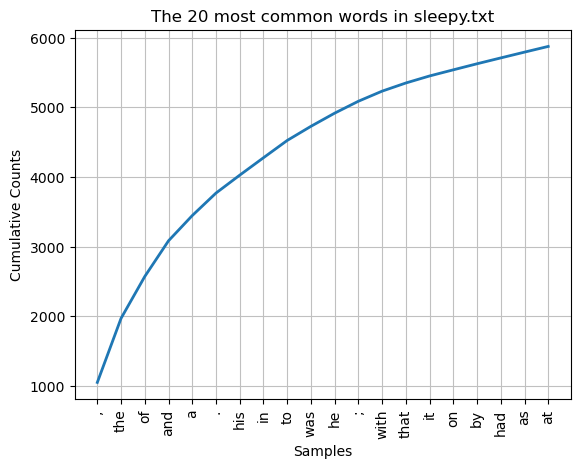

[('one', 45), ('ichabod', 45), ('upon', 34), ('old', 32), ('country', 28), ('like', 26), ('would', 26), ('time', 25), ('van', 25), ('little', 24), ('hollow', 23), ('along', 20), ('side', 18), ('might', 18), ('great', 18), ('head', 17), ('air', 17), ('sleepy', 16), ('every', 16), ('bridge', 16), ('whole', 15), ('away', 15), ('still', 15), ('among', 14), ('brook', 14), ('however', 14), ('church', 14), ('heard', 14), ('road', 14), ('brom', 14), ('dutch', 13), ('neighborhood', 13), ('story', 13), ('trees', 13), ('way', 13), ('heart', 13), ('night', 12), ('man', 12), ('made', 12), ('bones', 12), ('round', 11), ('good', 11), ('forth', 11), ('mind', 11), ('school', 11), ('tree', 11), ('horse', 11), ('steed', 11), ('found', 10), ('always', 10)]




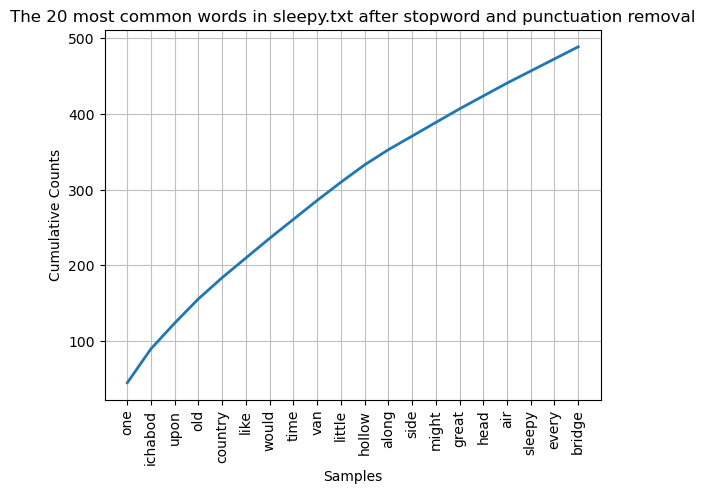

<AxesSubplot:title={'center':'The 20 most common words in sleepy.txt after stopword and punctuation removal'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [7]:
#insert your code below

fdist = FreqDist(token.lower() for token in sleepy_tok)
print(fdist.most_common(50)) # print the 50 most common words with their absolute frequency
print("\n")

# print the relative frequency of the 20 most common words
print(f"Relative frequencies of the 20 most common words:")
for token, freq in fdist.most_common(20):
    print(f"{token}: {round(freq/len(sleepy_tok),2)}")

# plot the cumulative frequency of the 20 most frequent words
fdist.plot(20,title='The 20 most common words in sleepy.txt', cumulative=True)

#### WITH STOPWORD AND PUNCTUATION REMOVAL ####

# create a frequency distribution after stopword and punctuation removal
fdist2 = FreqDist(token.lower() for token in sleepy_tok if ((token.lower() not in stopwords.words('english')) and 
                                                           not re.match(r"[^\s\w\d]+",token)))
print(fdist2.most_common(50))
print("\n")

fdist2.plot(20, title='The 20 most common words in sleepy.txt after stopword and punctuation removal', cumulative=True)



 -  3.2 (10%) What do the three different measures tell us? Insert your answer below:


The absolute frequency tells us how often a token appears in a text. For example, the token 'there' occurs 920 times in "sleepy.txt". The relative frequency on the other hand takes into account the size of the whole text and is calculated by dividing the absolute frequency by the number of tokens in the text. The absolute frequency of the token "the" is 0.08, meaning that 8% of all tokens in the text are instances of "the". The cumulative frequency plot shows "the sum of all frequencies up to and including the absolute frequency of the word in question" (cf. Paggio 2023: 20). The cumulative frequency of the token "the" is 1969 since it is the second most common token (or token with rank 2) and also includes the absolute frequency of the word with rank 1 (',' with an absolute frequency of 1049).

After stop word and punctuation removal the most common word is 'one' with an absolute frequency of only 45 (compared to ',' that occured 1049 times). This observation is in line with Zipf's law according to which a small number of words (usually stop words) occurs very often (cf. Paggio 2023: 23).

## Exercise 4 (15%):

 - Find and print the lemmas of sleepy.txt after having normalised the text. Write the results in the file sleepy-lemmas.txt so that each word is separated by its lemma by a backsash, e.g. This/this is/be an/a example/example.

In [8]:
# insert your code below

wnl=nltk.WordNetLemmatizer() # instantiate a WordNetLemmatizer()

# stop word and punctuation removal
lemmas = [(token, wnl.lemmatize(token.lower())) for token in sleepy_tok if ((token.lower() not in stopwords.words('english')) and 
                                                           not re.match(r"[^\s\w\d]+",token))]
with open("sleepy-lemmas.txt", "w") as f:
    for token, lemma in lemmas:
        f.write(f"{token}/{lemma} ")

## Exercise 5 (20%)

 -  5.1 (15%) Extend the pattern based tagger from the NLTK book and lesson 4 exercise to cover all pronouns, punctuation signs (tag ".", coordinating conjunctions (tag "CC"), modal auxiliary (tag "MD") and who-words (tag "WH"). Run the tagger om sleepy.txt and write the results in a file "my_sleepy-tagget.txt.  


In [9]:
#insert your code here
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    
    (r'I|you|he|she|it|we|they', 'PR'), # personal pronouns subject form (not keeping redundant forms in the following)
    (r'me|him|her|us|them', 'PR'), # personal pronouns object form
   (r'mine|yours|his|hers|its|ours|theirs', 'PR'), # possessive pronouns
    (r'this|these|that|those', 'PR'), # demonstrative pronouns
    (r'who|whom|which|what', 'PR'), # interrogative pronouns
    (r'whichever|whomever','PR'), # relative pronouns
    (r'all|another|any|anybody|anyone|anything|each|everybody|everyone|everything|few|many|nobody|none|one|several|some|somebody|someone','PR'), # indefinite pronouns
    (r'myself|yourself|himself|herself|ourselves|themselves','PR'), # reflexive pronouns (https://www.berlitz.com/blog/english-pronouns-grammar, retrieved Oct 18th 2023.)
    
    (r'[^\s\w\d]', '.'), # punctuation signs
    (r'and|or|nor|but|yet|so', 'CC'), #coordinating conjunctions
    (r'can|could|may|will|would|must|shall|should', 'MD'), # modal auxiliaries
    (r'who|what|where|why', 'WH'), # who-words
     (r'.*', 'NN'),                # nouns (default)]
]

regexp_tagger = nltk.RegexpTagger(patterns)
reg_tags = regexp_tagger.tag(sleepy_tok) # tag the tokens of "sleepy.txt"

with open("my_sleepy-tagget.txt", "w") as f:
    for token, tag in reg_tags:
        f.write(f"{token} {tag} \n") # write token and tags into new file

for token, tag in reg_tags[:30]:
    print(token + " " + tag)

the NN
legend NN
of NN
sleepy NN
hollow NN
by NN
washington NN
irving VBG
found NN
among NN
the NN
papers NNS
of NN
the NN
late NN
diedrich NN
knickerbocker NN
. .
a NN
pleasing VBG
land NN
of NN
drowsy NN
head PR
it PR
was NNS
, .
of NN
dreams NNS
that PR


 -  5.2  (5%) Look at the obtained results and explain which word types are still not tagged correctly. Insert your explanation below:

Generally, a lot of tokens are still incorrectly tagged. First, determiners (e.g. 'a' and 'the') are tagged as the default NN and prepositions as well (e.g. 'of' as NN). In addition, the tagger fails to correctly tag irregular past tense forms, e.g. tags 'found' as NN. Just to mention some examples, some tokens are incorrectly tagged as VBZ even though they are nouns ending in '-es' (e.g. 'castles') or as NNS just because their last character is a 's' (e.g. 'always' as NNS). Moreover, the proper noun 'Irving' gets tagged as VBG because it ends in '-ing'. In a nutshell, the pattern based tagger needs to be enhanced with more patterns or a more sophisticated approach is needed to increase the accuracy. 

### References

Paggio, P. (2023). Language Processing I: Words in text corpora (Session 2). Lecture Slides.